# Постановка задачи

Найти численное  решение граничной  задачи методом  стрельбы с шагом $0.01h$. Для численного решения задач Коши использовать явный метод трапеций. Сравнить найденное численное  решение с точным решением $u(x)$ , т.е. найти $max|u(x_i) - y_i|$.  

В одной системе  координат  построить  график  функции $u(x)$ и график полученного численного решения.

### Граничная задача
\begin{cases}
u'' + \frac{3x}{x^2 + 1}u' - \frac{2}{x^2 + 1}u = -\frac{4x^2 + 8}{(x^2 + 1)^3}\\
5u(0.5)=8\\
3u(1) + 2u'(1) = 1
\end{cases}

### Точное решение
$$u(x)=\frac{2}{x^2 + 1}$$

In [54]:
def f(x):
    return -((4 * x ** 2 + 8) / ((x ** 2 + 1) ** 3))


def p(x):
    return (3 * x) / (x ** 2 + 1)


def g(x):
    return -2 / (x ** 2 + 1)


def correct_solution(x):
    return 2 / (x ** 2 + 1)


a = 0.5
b = 1

a_0 = 5
b_0 = 0
g_0 = 8
a_1 = 3
b_1 = 2
g_1 = 1

<hr>

# Краткая теория, реализация метода


### Линейный метод стрельбы
Рассмотрим первую задачу Коши:

\begin{cases}
u_0''(x) + p(x)u_0'(x) + g(x)u_0(x) = f(x)\\
\alpha_0u_0(a) + \beta_0u_0'(a) = \gamma_0,
\end{cases}

где $\alpha_0$ и $\beta_0$ не обращаются в ноль одновременно. В нашем случае $\alpha_0 = 5 \ne 0$. Берём пристрелочный параметр $\eta_0 = u'(a)$, подстановкой во второе уравнение системы выше получаем, что
$$u(a) = \frac{\gamma_0 - \beta_0\eta_0}{\alpha_0}.$$

Аналогично, рассмотрим вторую задачу Коши

\begin{cases}
u_1''(x) + p(x)u_1'(x) + g(x)u_1(x) = 0\\
\alpha_1u_1(a) + \beta_1u_1'(a) = 0,
\end{cases}

где $\alpha_1$ и $\beta_1$ не обращаются в ноль одновременно. При пристрелочном параметре $\eta_1 = u'(a)$ получаем
$$u(a) = \frac{-\beta_0\eta_1}{\alpha_0}.$$

Таким образом, мы получили $u_0$ и $u_1$ (решения задач Коши) для левого граничного условия. Теперь найдём $C$, удовлетворяющее правому граничному условию, чтобы получить решение в виде $u = u_0 + C \cdot u_1$. Подставим это в правое граничное условие:

$$\alpha_1(u_0(b) + Cu_1(b)) + \beta_1(u_0'(b) + Cu_1'(b))=\gamma_1, $$
откуда
$$C = \frac{\gamma_1 - \alpha_1u_0(b) + \beta_1u_0'(b)}{\alpha_1u_1(b) + \beta_1u_1'(b)}.$$

Задачи Коши будем решать явным методом трапеций.


### Явный метод трапеций

Введём замену $\upsilon = u'$. Тогда
$(j+1)$-ое приближение функции методом трапеций находится из системы:


\begin{cases}
u_{j+1}=u_j+\frac{\tau}{2} \cdot (\upsilon_j + k)\\
\upsilon_{j + 1}=\upsilon_j+\frac{\tau}{2} \cdot (q_1 + q_2),
\end{cases}

где

\begin{cases}
q_1 = f(x_j) - p(x_j)\upsilon_j - g(x_j)u_j\\
k = \upsilon_j + \tau q_1\\
q_2 = f(x_{j+1}) - p(x_{j+1})k - g(x_{j+1})(u_j + \tau \upsilon_j)
\end{cases}

In [55]:
def explicit_trapezium_method(x_j, u_j, v_j, tau, b):
    """Реализация явного метода трапеций"""
    while x_j <= b:
        q1 = f(x_j) - p(x_j) * v_j - g(x_j) * u_j
        k = v_j + tau * q1
        q2 = f(x_j + tau) - p(x_j + tau) * k - g(x_j + tau) * (u_j + tau * v_j)
        u_j += tau * (v_j + k) / 2
        v_j += tau * (q1 + q2) / 2
        x_j += tau
        yield u_j, v_j


trap_1 = list(explicit_trapezium_method(x_j=0.5, u_j=8/5, v_j=0.5, tau=0.01, b=1))
trap_2 = list(explicit_trapezium_method(x_j=0.5, u_j=0, v_j=0.5, tau=0.01, b=1))
u_0_b, v_0_b = trap_1[-1]
u_1_b, v_1_b = trap_2[-1]
c = (g_1 - a_1 * u_0_b + b_1 * v_0_b) / (a_1 * u_1_b + b_1 * v_1_b)

i = 1
u = []
for (u_0, v_0), (u_1, v_1) in zip(trap_1, trap_2):
    u.append(u_0 + c * u_1)
    print(f'{i: 3d}th iteration. Estimated: {u[i - 1]: .8f}, Correct: {correct_solution(0.5 + i * 0.01): .8f}')
    i += 1

  1th iteration. Estimated:  1.61506946, Correct:  1.58717562
  2th iteration. Estimated:  1.62879625, Correct:  1.57430730
  3th iteration. Estimated:  1.64122273, Correct:  1.56140214
  4th iteration. Estimated:  1.65239063, Correct:  1.54846702
  5th iteration. Estimated:  1.66234101, Correct:  1.53550864
  6th iteration. Estimated:  1.67111428, Correct:  1.52253350
  7th iteration. Estimated:  1.67875014, Correct:  1.50954789
  8th iteration. Estimated:  1.68528754, Correct:  1.49655792
  9th iteration. Estimated:  1.69076472, Correct:  1.48356947
 10th iteration. Estimated:  1.69521917, Correct:  1.47058824
 11th iteration. Estimated:  1.69868757, Correct:  1.45761971
 12th iteration. Estimated:  1.70120588, Correct:  1.44466917
 13th iteration. Estimated:  1.70280922, Correct:  1.43174171
 14th iteration. Estimated:  1.70353193, Correct:  1.41884222
 15th iteration. Estimated:  1.70340758, Correct:  1.40597540
 16th iteration. Estimated:  1.70246889, Correct:  1.39314572
 17th it

### Функции для оценки точности методов

In [49]:
import numpy as np
x = np.arange(0.51, 1.01, 0.01)
correct = np.array([correct_solution(t) for t in x])
trap_exp = np.array(u)


def abs_approximation_error(correct_sol, values):
    """Функция оценки точности (максимум модуля погрешности)"""
    return max(abs(correct_sol - values))

abs_approximation_error(correct, trap_exp)

0.11404273097658857

### График явного метода трапеций рядом с точным решением

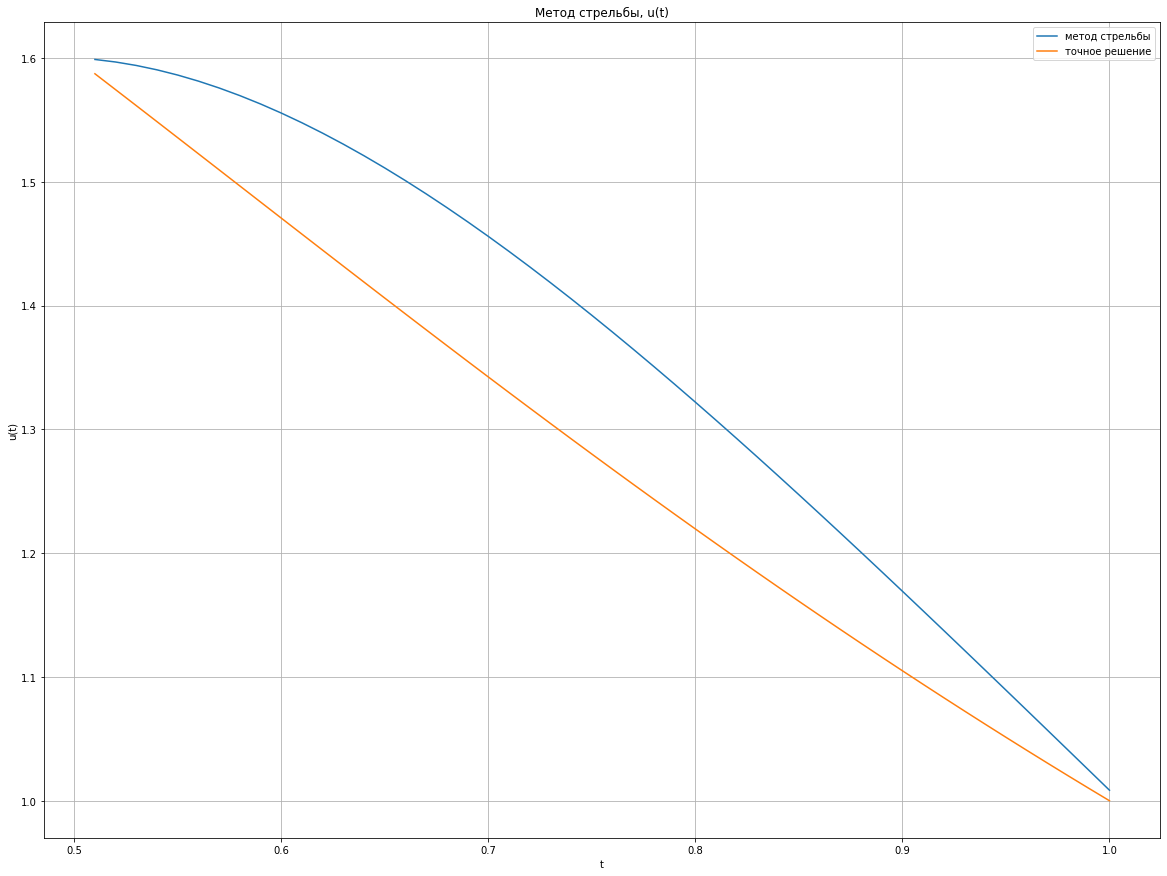

In [50]:
from matplotlib import pyplot as plt


fig, ax = plt.subplots(figsize=(20, 15))
ax.plot(x, u, label='метод стрельбы')
ax.plot(x, correct, label='точное решение')

ax.set_xlabel('t')
ax.set_ylabel('u(t)')
ax.set_title('Метод стрельбы, u(t)')
ax.grid()
ax.legend()
plt.show()

# Выводы

По сравнению с явным методом трапеций, неявный метод продемонстрировал более высокую точность приближения (что, в целом, было ожидаемо, с учётом разных степеней точности методов). Явный метод Рунге-Кутты 4 порядка, ожидаемо, позволил получить ещё более близкое к точному решению приближение. Интерполяционный метод Адамса, несмотря на многошаговость и сложность реализации, показал гораздо худший результат, чем любой из одношаговых методов.